# Data Transformation

In [1]:
# setup
options(repr.plot.width = 10, repr.plot.height = 8)
options(warns = -1)

# libraries
suppressMessages({
    library(tidyverse)
    library(nycflights13)
})

Warning message:
"package 'nycflights13' was built under R version 4.3.1"


In [4]:
# view the data
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [5]:
# get info about the data
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

## Using Pipe With `dplyr`

### Using Filter

In [8]:
# filter the data to see flights more than 120 minutes delay
# and view the first 2 rows
flights %>%
    filter(dep_delay > 120) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00


In [10]:
# filter the data to see flights more than 120 minutes delay and departed on December
# and view the first 2 rows
flights %>%
    filter(dep_delay > 120 & month == 12) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,1,657,1930,687,1010,2249,681,DL,1091,N342NW,JFK,SAT,211,1587,19,30,2013-12-01 19:00:00
2013,12,1,941,710,151,1105,855,130,WN,3791,N7730A,EWR,STL,128,872,7,10,2013-12-01 07:00:00


In [13]:
# filter the data to see flights more than 120 minutes delay and departed on December and November
# and view the first 2 rows
flights %>%
    filter(dep_delay > 120 & month %in% c(11, 12)) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,1259,1040,139,1426,1159,147,B6,2602,N265JB,JFK,BUF,67,301,10,40,2013-11-01 10:00:00
2013,11,1,1310,845,265,1423,1030,233,EV,5288,N722EV,LGA,BUF,48,292,8,45,2013-11-01 08:00:00


### Using Sorting Function

In [17]:
# sort by dep_delay and view the first 2 rows
flights %>%
    arrange(year, month, dep_delay) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,11,1900,1930,-30,2233,2243,-10,DL,1435,N934DL,LGA,TPA,139,1010,19,30,2013-01-11 19:00:00
2013,1,29,1703,1730,-27,1947,1957,-10,F9,837,N208FR,LGA,DEN,250,1620,17,30,2013-01-29 17:00:00


In [18]:
# sort by dep_delay and view the first 2 rows (descending)
flights %>%
    arrange(desc(dep_delay)) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00


### Finding Unique Rows

In [19]:
# get the unique rows for origin and dest
# show the first two rows
flights %>%
    distinct(origin, dest) %>%
    head(n=2)

origin,dest
<chr>,<chr>
EWR,IAH
LGA,IAH


In [20]:
# we can also keep the other column when we get the unique rows for origin and dest
# show the first two rows
flights %>%
    distinct(origin, dest, .keep_all = TRUE) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


## Working With Columns

In [22]:
# creating feature with mutate
# create a new column called gain
# gain = arr_delay - dep_delay
# create a new column called speed
# speed = distance / air_time

flights %>%
    mutate(gain = arr_delay - dep_delay,
           speed = distance / air_time * 60) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,9,370.0441
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,16,374.2731


In [23]:
# we dont's want to column on the right, let's put them on the left
flights %>%
    mutate(gain = arr_delay - dep_delay,
           speed = distance / air_time * 60,
           .before = 1) %>%
    head(n=2)

gain,speed,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
9,370.0441,2013,1,1,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
16,374.2731,2013,1,1,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


In [24]:
# we can also put in at a specific position
flights %>%
    mutate(gain = arr_delay - dep_delay,
           speed = distance / air_time * 60,
           .after = day) %>%
    head(n=2)

year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,9,370.0441,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,16,374.2731,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


### Select the column we want

In [25]:
# select by name
flights %>%
    select(year, month, day) %>%
    head(n=2)

# select between columns
flights %>%
    select(year:day) %>%
    head(n=2)

# selct all columns except year, month, day
flights %>%
    select(-(year:day)) %>%
    head(n=2)

# only select character columns
flights %>%
    select(where(is.character)) %>%
    head(n=2)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1


dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


carrier,tailnum,origin,dest
<chr>,<chr>,<chr>,<chr>
UA,N14228,EWR,IAH
UA,N24211,LGA,IAH


In [27]:
# rename column
flights %>%
    select(tail_num = tailnum) %>%
    head(n=2)

# alternatively
flights %>%
    rename(tail_num = tailnum) %>%
    head(n=2)

tail_num
<chr>
N14228
N24211


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


### Moving columns around

In [28]:
# move time_hour infront of air_time
flights %>%
    relocate(time_hour, air_time) %>%
    head(n=2)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29


## Piping

In [31]:
# let's do a demo using pipe
flights %>%
    filter(dest == 'IAH') %>%
    mutate(speed = distance / air_time * 60) %>%
    select(year:day, dep_time, carrier, flight, speed) %>%
    arrange(desc(speed)) %>%
    head(n=2)

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270


## Grouping

In [32]:
# group by month
flights %>%
    group_by(month) %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


In [35]:
# group by month and summarize by dep_delay
flights %>%
    group_by(month) %>%
    summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE)) %>%
    head(n=2)

# let's add a count to see how many flights are in each month
flights %>%
    group_by(month) %>%
    summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE),
              n = n()) %>%
    head(n=2)

month,mean_dep_delay
<int>,<dbl>
1,10.03667
2,10.81684


month,mean_dep_delay,n
<int>,<dbl>,<int>
1,10.03667,27004
2,10.81684,24951


In [37]:
# group by dest and slice_max the arr_delay
flights %>%
    group_by(dest) %>%
    slice_max(arr_delay, n = 1) %>%
    relocate(dest)  %>%
    head(n=2)

dest,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
ABQ,2013,7,22,2145,2007,98,132,2259,153,B6,1505,N784JB,JFK,259,1826,20,7,2013-07-22 20:00:00
ACK,2013,7,23,1139,800,219,1250,909,221,B6,1491,N192JB,JFK,44,199,8,0,2013-07-23 08:00:00


In [2]:
# group by variable
daily <- flights %>%
    group_by(year, month, day)
head(daily)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [3]:
# ungroup
daily %>%
    ungroup() %>%
    head(n=2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


In [5]:
# summarize the ungrouped data frame
daily %>%
    ungroup() %>%
    summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE, flights = n())) %>%
    head(n=3)

mean_dep_delay
<dbl>
12.63907


We can also use `.by` to achieve grouping or ungrouping result

In [6]:
# using .by
flights %>%
    summarize(
        delay = mean(dep_delay, na.rm = TRUE),
        n = n(),
        .by = month
    ) %>%
    head(n=3)


month,delay,n
<int>,<dbl>,<int>
1,10.036665,27004
10,6.243988,28889
11,5.435362,27268


## A Case study

We will compare what proportions of times a player gets a hit versus the number of times they try to put the ball in play

In [8]:
batters <- Lahman::Batting %>%
    group_by(playerID) %>%
    summarize(
        performance = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
        n = sum(AB, na.rm = TRUE)
    )
head(batters)

playerID,performance,n
<chr>,<dbl>,<int>
aardsda01,0.0000000,4
aaronha01,0.3049984,12364
aaronto01,0.2288136,944
aasedo01,0.0000000,5
abadan01,0.0952381,21
abadfe01,0.1111111,9


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


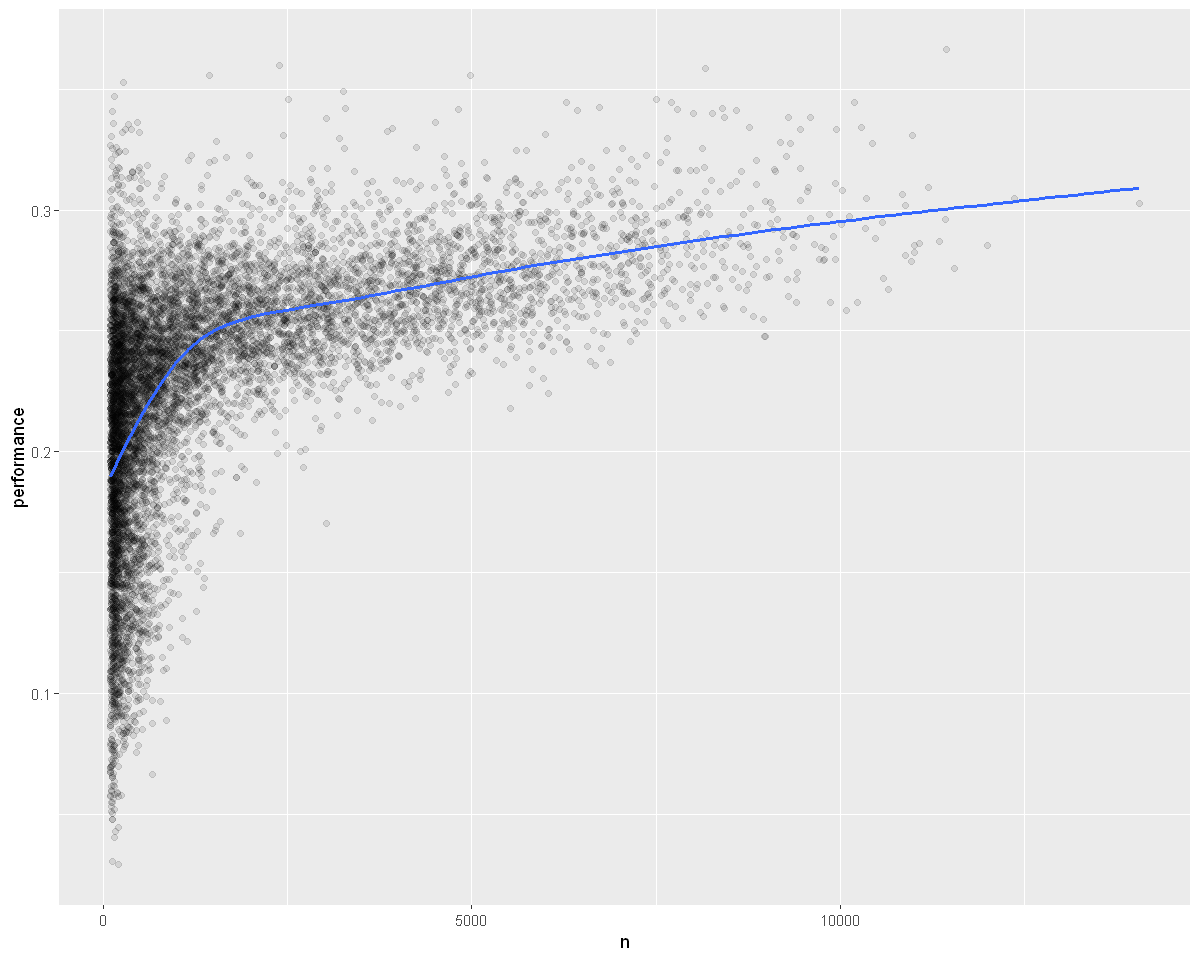

In [9]:
# plot n versus performance
batters %>%
    filter(n > 100) %>%
    ggplot(aes(n, performance)) +
    geom_point(alpha = 0.1) +
    geom_smooth(se = FALSE)

We can see that

- Variation is larger among players with fewer at-bats and variation decreases as the sample size increases
- Positive correlation between skill (performance) and opportunities to hit the ball (n). Teams want to give their best batters the most chance to hit the ball

In [10]:
batters %>%
    arrange(desc(performance)) %>%
    head()

playerID,performance,n
<chr>,<dbl>,<int>
abramge01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2


People with the best batting average are clearly the ones who tried to put the ball in play very few times and happened to get a hit, but they are not necessarily the most skilled player